In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
data = pd.read_csv("input/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Data Graphs</h1>

Text(0.5, 1.0, 'Passangers fitlered by sex')

<Figure size 360x720 with 0 Axes>

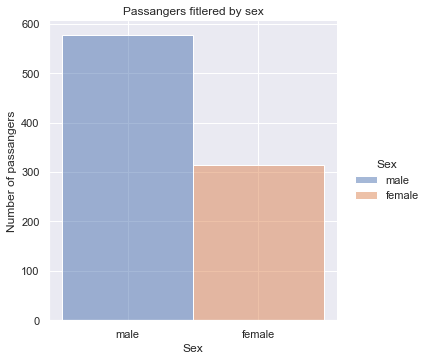

In [5]:
fig = plt.figure(figsize=(5,10))
sns.displot(x="Sex",data=data,hue="Sex")
plt.ylabel("Number of passangers")
plt.title("Passangers fitlered by sex")

Text(0.5, 1.0, 'Survived passangers filterd by Age')

<Figure size 360x864 with 0 Axes>

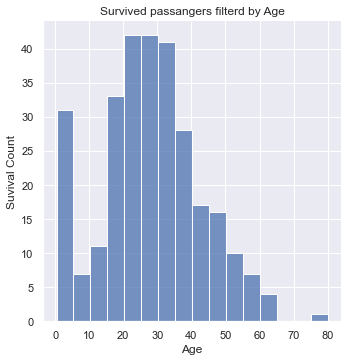

In [6]:
fig = plt.figure(figsize=(5,12))
sns.displot(x=data[data["Survived"]==1]["Age"],data=data)
plt.ylabel("Suvival Count")
plt.title("Survived passangers filterd by Age")

Text(0.5, 1.0, 'Dead passangers filterd by Age')

<Figure size 360x864 with 0 Axes>

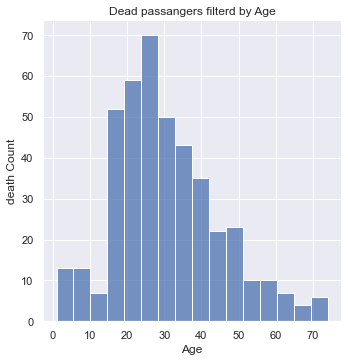

In [7]:
fig = plt.figure(figsize=(5,12))
sns.displot(x=data[data["Survived"]==0]["Age"],data=data)
plt.ylabel("death Count")
plt.title("Dead passangers filterd by Age")

Text(0.5, 1.0, 'Dead passangers filtered by Sex')

<Figure size 360x864 with 0 Axes>

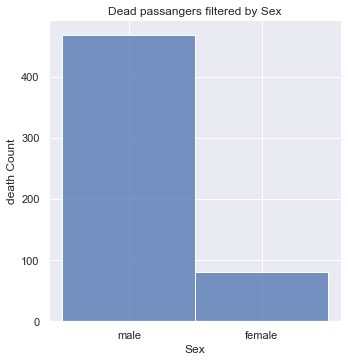

In [8]:
fig = plt.figure(figsize=(5,12))
sns.displot(x=data[data["Survived"]==0]["Sex"],data=data)
plt.ylabel("death Count")
plt.title("Dead passangers filtered by Sex")

Text(0.5, 1.0, 'Survived passangers filterd by Sex')

<Figure size 360x864 with 0 Axes>

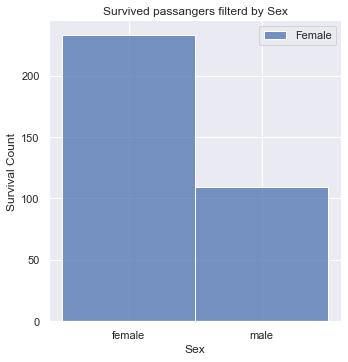

In [9]:
fig = plt.figure(figsize=(5,12))
sns.displot(x=data[data["Survived"]==1]["Sex"],data=data,)
plt.legend(["Female","Male"])
plt.ylabel("Survival Count")
plt.title("Survived passangers filterd by Sex")

In [10]:
survived = data[data["Survived"]==1]["Sex"].value_counts()
died = data[data["Survived"]==0]["Sex"].value_counts()

In [11]:
sex_df = pd.DataFrame([survived,died])
sex_df.index=["Survived","Died"]

In [12]:
sex_df.head()

,female,male
Survived,233,109
Died,81,468


<AxesSubplot:title={'center':'Survived/Died filtered by Sex'}>

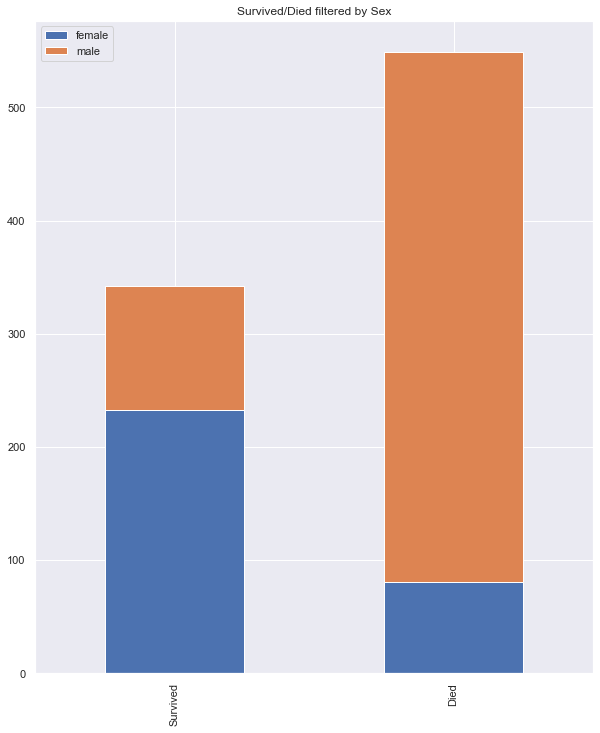

In [13]:
sex_df.plot(kind="bar",stacked=True,figsize=(10,12),title="Survived/Died filtered by Sex")

<AxesSubplot:xlabel='Sex'>

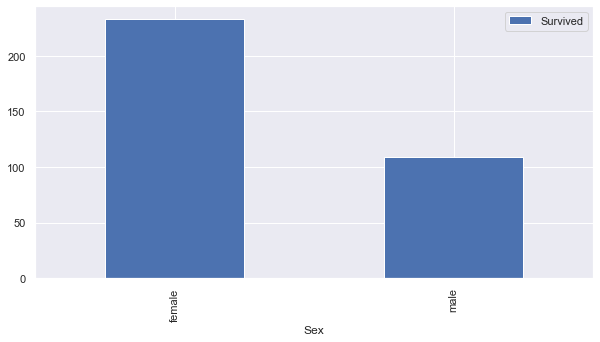

In [14]:
data.groupby("Sex").agg("sum")[["Survived"]].plot(kind="bar",figsize=(10,5))

In [15]:
data["Died"]= 1- data["Survived"]

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<AxesSubplot:xlabel='Pclass'>

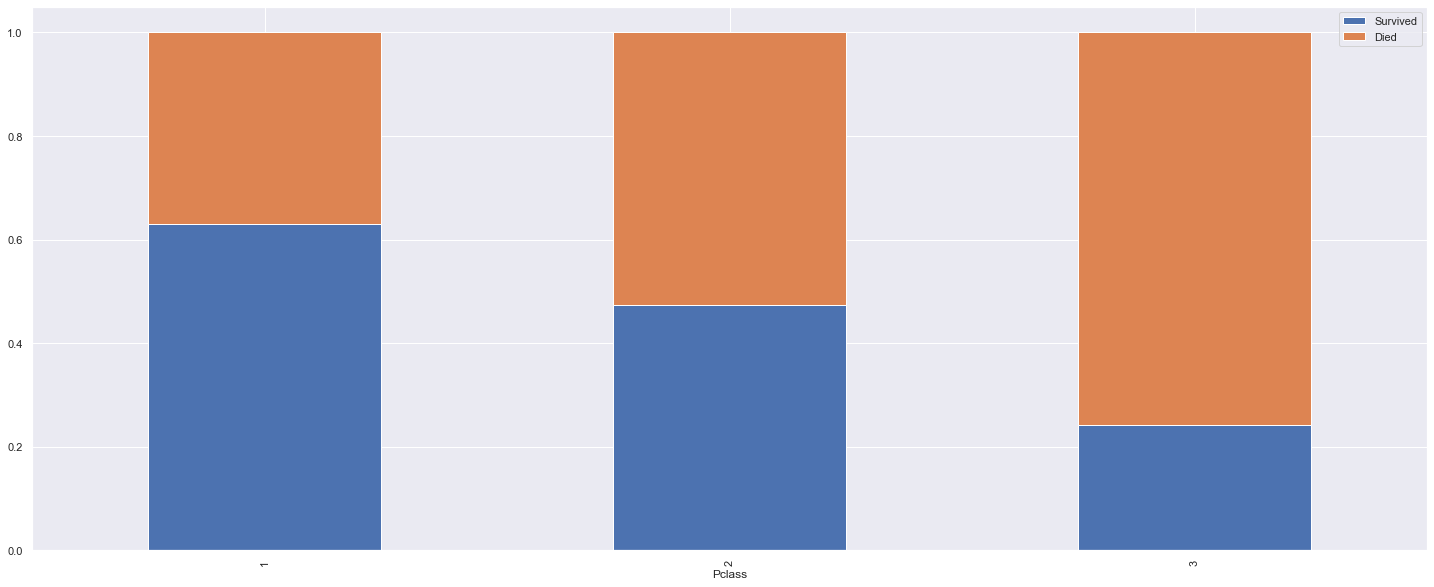

In [17]:
data.groupby("Pclass").agg("mean")[["Survived","Died"]].plot(kind="bar",stacked=True,figsize=(25,10))

<AxesSubplot:xlabel='Sex'>

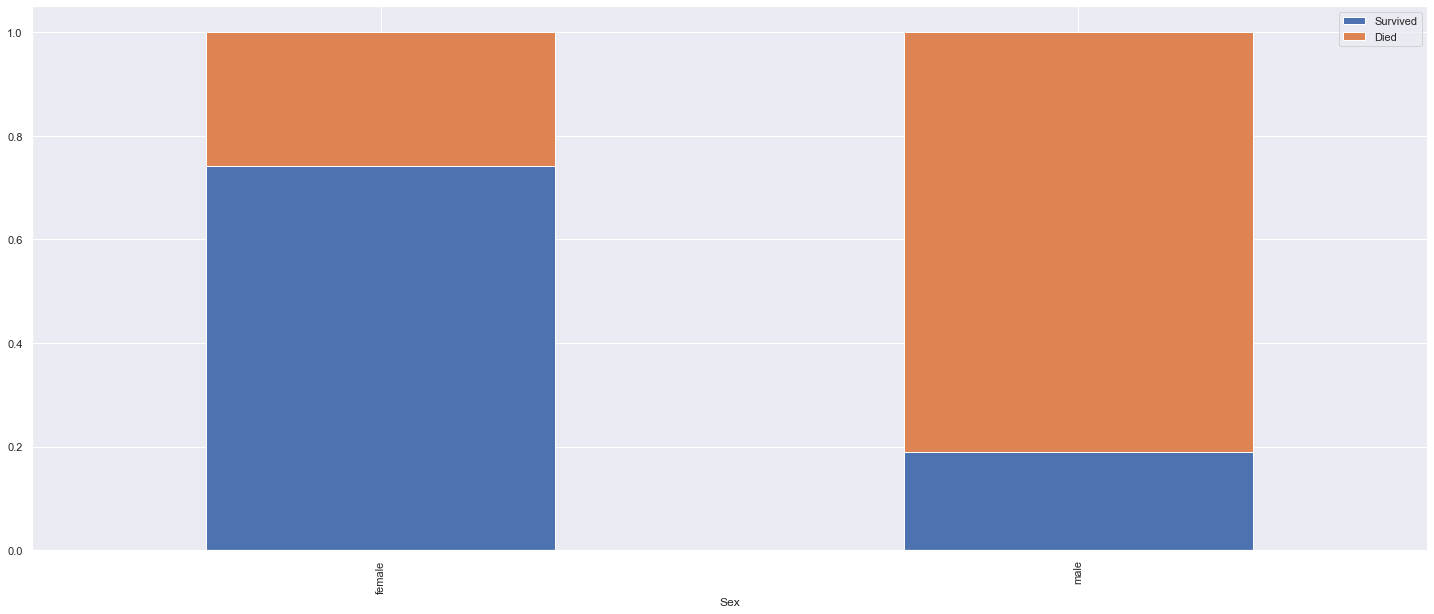

In [18]:
data.groupby("Sex").agg("mean")[["Survived","Died"]].plot(kind="bar",stacked=True,figsize=(25,10))

<AxesSubplot:xlabel='SibSp'>

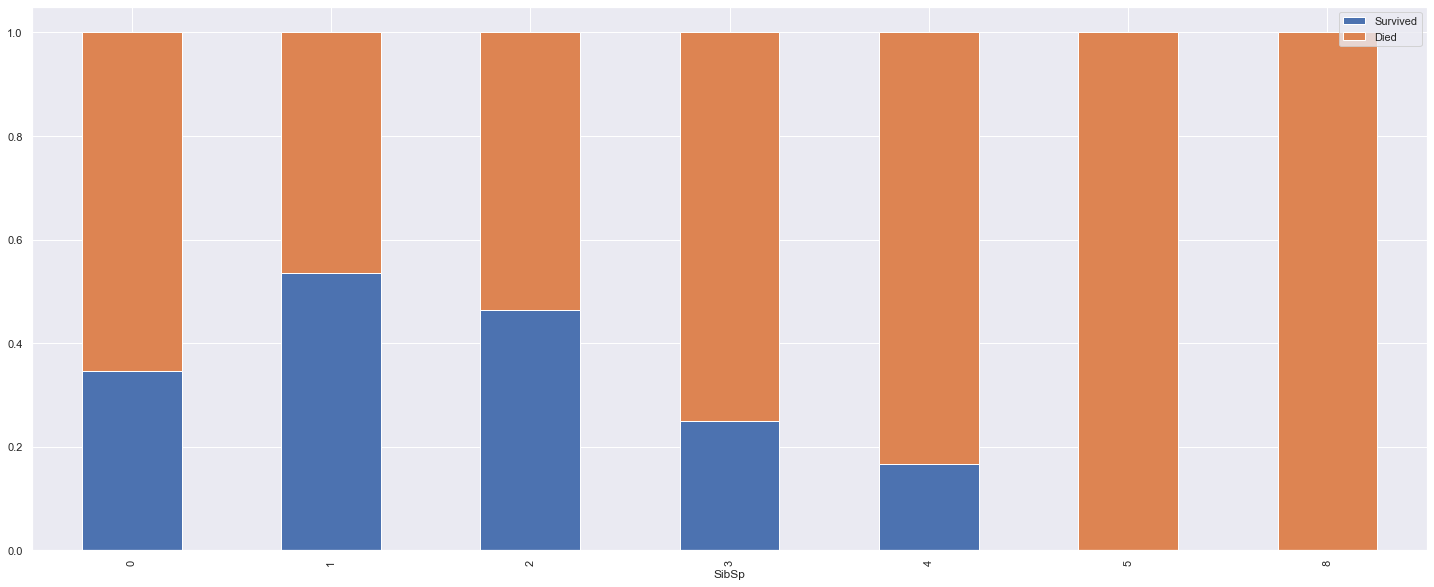

In [19]:
data.groupby("SibSp").agg("mean")[["Survived","Died"]].plot(kind="bar",stacked=True,figsize=(25,10))

<AxesSubplot:xlabel='Sex', ylabel='Age'>

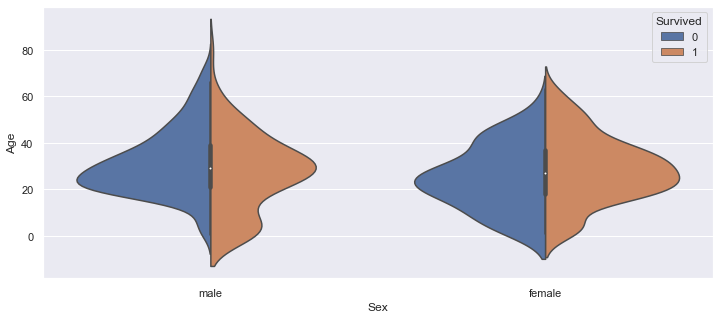

In [20]:
fig = plt.figure(figsize=(12,5))
sns.violinplot(x="Sex",y="Age",data=data,hue="Survived",split=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

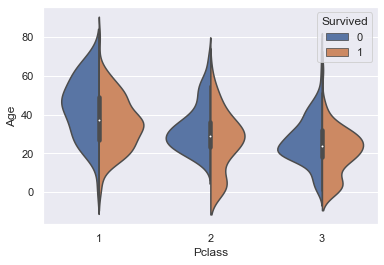

In [21]:
sns.violinplot(x="Pclass",y="Age",data=data,hue="Survived",split=True,orient="v")

In [22]:
data["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.616162
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


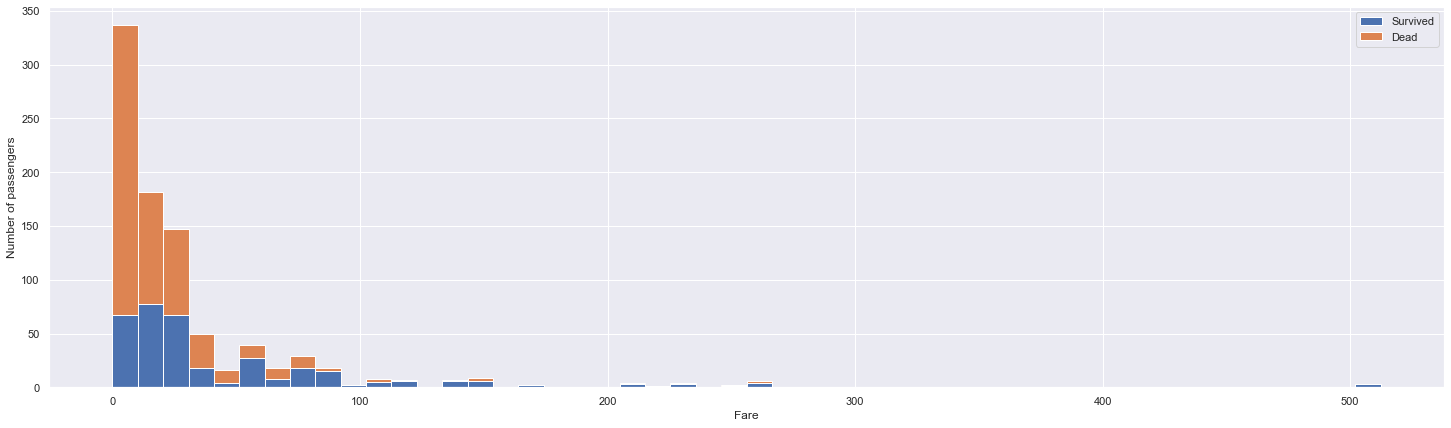

In [24]:
fig = plt.figure(figsize=(25,7))
plt.hist([data[data["Survived"]==1]["Fare"],data[data["Survived"]==0]["Fare"]],stacked=True,bins=50,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

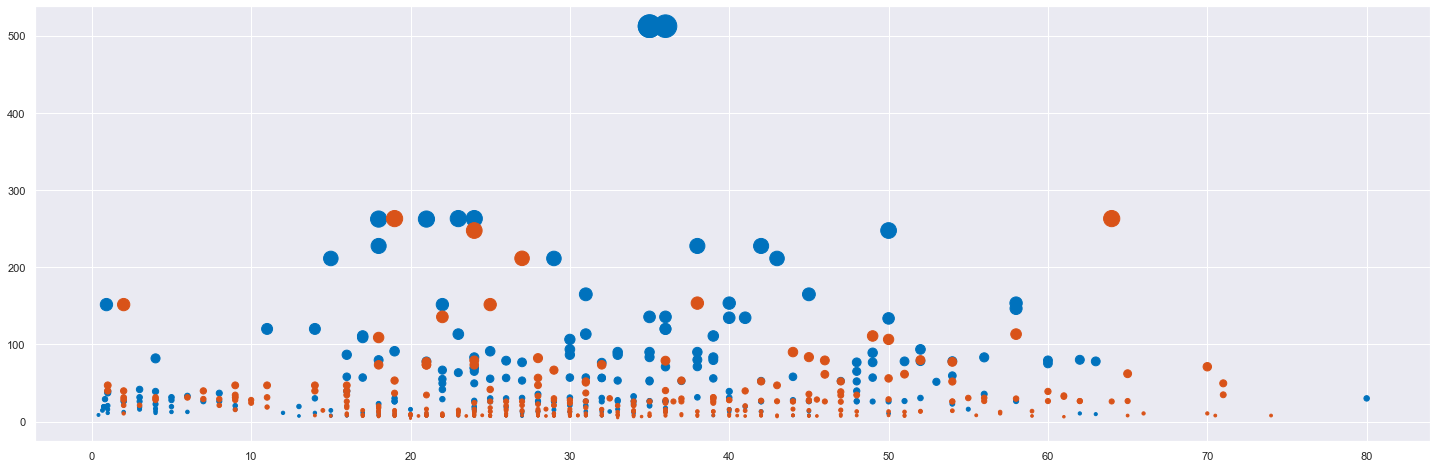

In [25]:
fig = plt.figure(figsize=(25,8))
ax = plt.subplot()
ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c="#0072BD", s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c="#D95319", s=data[data['Survived'] == 0]['Fare'])


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

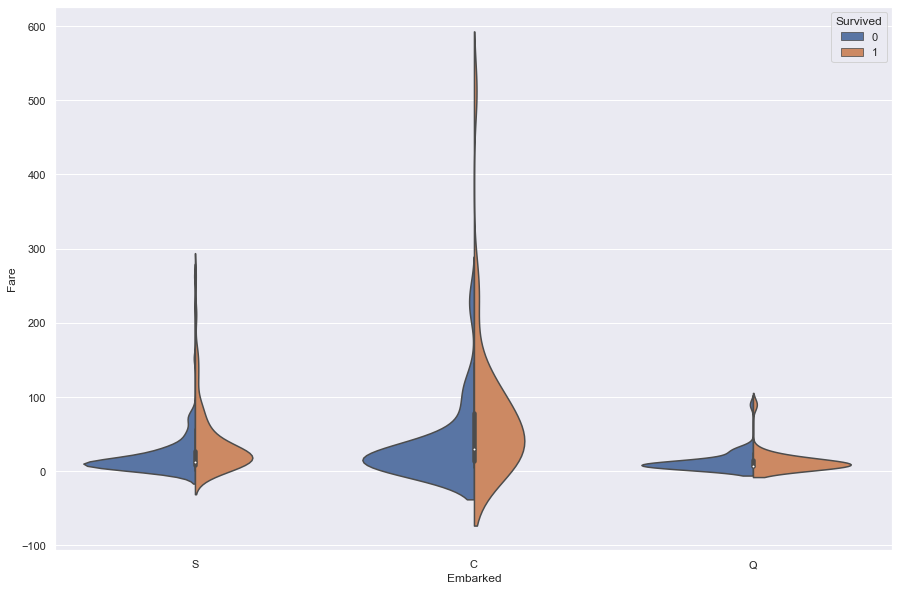

In [26]:
fig = plt.figure(figsize=(15 ,10))
sns.violinplot(x="Embarked",y="Fare",data=data,hue="Survived",split=True)

In [36]:
def get_combined_data():
    train =pd.read_csv("input/train.csv")
    test = pd.read_csv("input/test.csv")
    targets = train["Survived"]
    train.drop(["Survived"],axis=1,inplace=True)
    combined =train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(["index","PassengerId"],inplace=True,axis=1)
    return combined
combinedData = get_combined_data()

In [37]:
combinedData.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
combinedData.shape

(1309, 10)

In [39]:
titles = set()
for name in combinedData["Name"]:
    titles.add(name.split(",")[1].split(".")[0].strip())

In [40]:
print(titles)

{'Miss', 'the Countess', 'Sir', 'Master', 'Mme', 'Capt', 'Dona', 'Mr', 'Major', 'Dr', 'Mrs', 'Lady', 'Mlle', 'Jonkheer', 'Ms', 'Col', 'Don', 'Rev'}


In [44]:
Title_Dictionary = {'Miss':"Miss", 
                    'the Countess':"Royality", 
                    'Sir':"Royality",
                    'Master':"Master",
                    'Mme':"Mrs", 
                    'Capt':"Officer",
                    'Dona':"Miss", 
                    'Mr':"Mr", 
                    'Major':"Major",
                    'Dr':"Officer", 
                    'Mrs': "Mrs",
                    'Lady': "Royalty",
                    'Mlle':"Miss", 
                    'Jonkheer':"Royality", 
                    'Ms':"Mrs",
                    'Col':"Officer", 
                    'Don':"Royality",
                    'Rev':"Officer"}

In [47]:
def get_Titles():
    combinedData["Title"] =combinedData["Name"].map(lambda name : name.split(",")[1].split(".")[0].strip())
    combinedData["Title"] = combinedData.Title.map(Title_Dictionary)
    return combinedData


In [50]:
combinedData= get_Titles()
combinedData.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [52]:
combinedData[combinedData['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [55]:
print(combinedData.iloc[:891].Age.isnull().sum())

177


In [66]:
grouped_train = combinedData.iloc[:891].groupby(["Sex","Pclass","Title"])

In [67]:
grouped_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
694,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,Officer
759,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,Royality
796,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Officer
802,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,Master


In [68]:
grouped_median_train = grouped_train.median()

In [69]:
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [70]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royality,33.0
4,female,1,Royalty,48.0
